In [12]:
import numpy as np
import json
import datetime
import time
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def MySpline(x, y):
    n = len(x)
    h = np.zeros(n-1)
    b = np.zeros(n-1)
    c = np.zeros(n-1)
    a = np.zeros(n)
    
    M = np.zeros((n,n))
    r = np.zeros(n)
    
    h = np.array([x[k+1]-x[k] for k in range(0, n-1)])
    M[0][0] = h[0]/3
    M[0][1] = h[0]/6
    M[n-1][n-2] = h[n-2]/6
    M[n-1][n-1] = h[n-2]/3
    
    for i in range(1, n-1):
        M[i][i-1] = h[i-1]/6
        M[i][i] = (h[i-1] + h[i])/3
        M[i][i+1] = h[i]/6
        
    r[0] = (y[1]-y[0])/h[0] - 0
    r[n-1] = 0 - (y[n-1]-y[n-2])/h[n-2]
    
    for i in range(1, n-1):
        r[i] = (y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1]
    
    a = np.linalg.solve(M, r)
    
    for i in range(n-1):
        b[i] = y[i]/h[i] - a[i]*h[i]/6
        c[i] = y[i+1]/h[i] - a[i+1]*h[i]/6
    

    def spline(xvals, x=x, a=a, b=b, c=c):
        '''
         S = spline(xvals)
         
         Evaluates the cubic spline at xvals.
         
         Inputs:
          xvals can be list-like, or a scalar (**must be in ascending order**)
          
         Output:
          S is a list of values with the same number of elements as x
        '''
        # Turn non-list-like input into list-like
        if type(xvals) not in (list, np.ndarray,):
            xvals = [xvals]
        
        S = []  # The return list of values
        
        # 
        k = 0   # this is the current polynomial piece
        hk = x[k+1] - x[k]

        for xx in xvals:

            # If the next x-value is not on the current piece...
            if xx>x[k+1]:
                # ... Go to next piece
                k += 1
                hk = x[k+1] - x[k]

            S_of_x = a[k]*(x[k+1]-xx)**3/(6*hk) + a[k+1]*(xx-x[k])**3/(6*hk) + b[k]*(x[k+1]-xx) + c[k]*(xx-x[k])

            S.append(S_of_x)
        
        return S
    #======================================
    
    return spline

### Reading Data from a JSON file

In [ ]:
filepath = ""       # add raw data path

with open(filepath) as f:
  data = json.load(f)

### **1. Plotting the route-map of the user**

Text(0.5, 1.0, 'XY coordinates from start(red) to finish(green)')

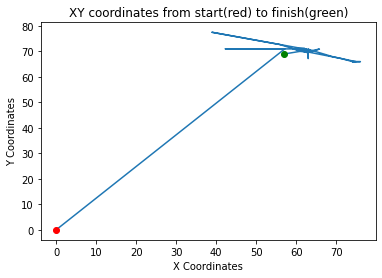

In [11]:
data = {"events":[{"itemHeld":"ItemStack{AIR x 0}","event":"PlayerItemHeldEvent","coords":[0.0,0.0,0.0],"yaw":0.0,"timestamp":"2020-07-16 17:50:12.061"},{"event":"PlayerAnimationEvent","coords":[0.0,0.0,0.0],"yaw":0.0,"timestamp":"2020-07-16 17:50:12.303","animation":"ARM_SWING"},{"event":"PLayerMoveEvent","coords":[58.0,71.0,-190.0],"yaw":297.4475402832031,"timestamp":"2020-07-16 17:50:12.948"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2305122f","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-188},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[58.0,71.0,-190.0],"yaw":297.4475402832031,"timestamp":"2020-07-16 17:50:13.304"},{"event":"PlayerAnimationEvent","coords":[58.0,71.0,-190.0],"yaw":297.4475402832031,"timestamp":"2020-07-16 17:50:13.304","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[58.0,71.0,-190.0],"yaw":297.4475402832031,"timestamp":"2020-07-16 17:50:13.304","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[58.0,71.0,-190.0],"yaw":297.4475402832031,"timestamp":"2020-07-16 17:50:13.305","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[58.0,71.0,-189.0],"yaw":315.1475524902344,"timestamp":"2020-07-16 17:50:22.226"},{"event":"PlayerMoveEvent","coords":[59.0,71.0,-189.0],"yaw":315.1475524902344,"timestamp":"2020-07-16 17:50:22.326"},{"event":"PlayerMoveEvent","coords":[59.0,71.0,-188.0],"yaw":304.0475158691406,"timestamp":"2020-07-16 17:50:22.575"},{"event":"PlayerMoveEvent","coords":[60.0,71.0,-188.0],"yaw":302.0975341796875,"timestamp":"2020-07-16 17:50:22.626"},{"event":"PlayerMoveEvent","coords":[61.0,71.0,-188.0],"yaw":301.9475402832031,"timestamp":"2020-07-16 17:50:22.926"},{"event":"PlayerMoveEvent","coords":[61.0,71.0,-187.0],"yaw":298.49749755859375,"timestamp":"2020-07-16 17:50:23.026"},{"event":"PlayerMoveEvent","coords":[62.0,71.0,-187.0],"yaw":300.2974853515625,"timestamp":"2020-07-16 17:50:23.175"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-187.0],"yaw":299.8475036621094,"timestamp":"2020-07-16 17:50:23.326"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-186.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:23.526"},{"event":"PlayerMoveEvent","coords":[63.0,71.0,-186.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:23.675"},{"event":"PlayerMoveEvent","coords":[64.0,71.0,-186.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:23.825"},{"event":"PlayerMoveEvent","coords":[64.0,70.0,-186.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:23.975"},{"event":"PlayerMoveEvent","coords":[64.0,70.0,-185.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:24.125"},{"event":"PlayerMoveEvent","coords":[65.0,70.0,-185.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:24.175"},{"event":"PlayerMoveEvent","coords":[65.0,69.0,-185.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:24.276"},{"event":"PlayerMoveEvent","coords":[66.0,69.0,-185.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:24.425"},{"event":"PlayerMoveEvent","coords":[66.0,69.0,-184.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:24.625"},{"event":"PlayerMoveEvent","coords":[67.0,69.0,-184.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:24.675"},{"event":"PlayerMoveEvent","coords":[67.0,68.0,-184.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:24.825"},{"event":"PlayerMoveEvent","coords":[68.0,68.0,-184.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:25.025"},{"event":"PlayerMoveEvent","coords":[68.0,68.0,-183.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:25.126"},{"event":"PlayerMoveEvent","coords":[69.0,68.0,-183.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:25.276"},{"event":"PlayerMoveEvent","coords":[69.0,69.0,-183.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:25.475"},{"event":"PlayerMoveEvent","coords":[70.0,69.0,-183.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:25.626"},{"event":"PlayerMoveEvent","coords":[70.0,68.0,-182.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:25.776"},{"event":"PlayerMoveEvent","coords":[70.0,67.0,-182.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:25.926"},{"event":"PlayerMoveEvent","coords":[71.0,67.0,-182.0],"yaw":298.49755859375,"timestamp":"2020-07-16 17:50:26.125"},{"event":"PlayerMoveEvent","coords":[72.0,67.0,-182.0],"yaw":293.99755859375,"timestamp":"2020-07-16 17:50:26.376"},{"event":"PlayerMoveEvent","coords":[72.0,67.0,-181.0],"yaw":279.7475280761719,"timestamp":"2020-07-16 17:50:26.476"},{"event":"PlayerMoveEvent","coords":[72.0,66.0,-181.0],"yaw":277.197509765625,"timestamp":"2020-07-16 17:50:26.527"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230c67f0","block":"CraftBlock{pos=BlockPosition{x=74, y=65, z=-181},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[72.0,66.0,-181.0],"yaw":277.197509765625,"timestamp":"2020-07-16 17:50:26.675"},{"event":"PlayerAnimationEvent","coords":[72.0,66.0,-181.0],"yaw":277.197509765625,"timestamp":"2020-07-16 17:50:26.675","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[72.0,66.0,-181.0],"yaw":277.197509765625,"timestamp":"2020-07-16 17:50:26.675","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[73.0,66.0,-181.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:26.676"},{"event":"PlayerAnimationEvent","coords":[73.0,66.0,-181.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:26.728","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[73.0,66.0,-181.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:26.775","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[74.0,66.0,-181.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:26.925"},{"event":"PlayerMoveEvent","coords":[75.0,66.0,-181.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:27.175"},{"event":"PlayerMoveEvent","coords":[74.0,66.0,-181.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:27.925"},{"event":"PlayerMoveEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:28.425"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230d7a42","block":"CraftBlock{pos=BlockPosition{x=75, y=65, z=-180},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:35.227"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:35.227","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:35.227","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:35.275","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:35.326","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230d7a42","block":"CraftBlock{pos=BlockPosition{x=75, y=65, z=-180},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:36.227"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:36.227","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:36.227","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:36.275","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230d7a42","block":"CraftBlock{pos=BlockPosition{x=75, y=65, z=-180},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:36.578"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:36.58","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:36.581","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:36.626","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:36.676","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230d7a42","block":"CraftBlock{pos=BlockPosition{x=75, y=65, z=-180},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:36.976"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:36.976","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:36.976","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:37.026","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:37.076","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230d7a8b","block":"CraftBlock{pos=BlockPosition{x=76, y=65, z=-180},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:37.677"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:37.677","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:37.677","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:37.726","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230d7a8b","block":"CraftBlock{pos=BlockPosition{x=76, y=65, z=-180},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.076"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.076","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.076","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.126","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230d79f9","block":"CraftBlock{pos=BlockPosition{x=74, y=65, z=-180},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.476"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.477","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.477","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.526","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.575","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230d79f9","block":"CraftBlock{pos=BlockPosition{x=74, y=65, z=-180},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.726"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.726","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.726","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.776","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230d79f9","block":"CraftBlock{pos=BlockPosition{x=74, y=65, z=-180},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.925"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.926","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:38.926","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230d79f9","block":"CraftBlock{pos=BlockPosition{x=74, y=65, z=-180},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:39.126"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:39.126","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:39.126","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230d79f9","block":"CraftBlock{pos=BlockPosition{x=74, y=65, z=-180},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:39.276"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:39.276","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:39.276","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230d79f9","block":"CraftBlock{pos=BlockPosition{x=74, y=65, z=-180},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:39.379"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:39.379","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:39.379","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[74.0,66.0,-180.0],"yaw":275.3975524902344,"timestamp":"2020-07-16 17:50:39.429","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[75.0,66.0,-180.0],"yaw":265.347412109375,"timestamp":"2020-07-16 17:50:39.927"},{"event":"PlayerMoveEvent","coords":[75.0,66.0,-181.0],"yaw":229.1974334716797,"timestamp":"2020-07-16 17:50:40.076"},{"event":"PlayerMoveEvent","coords":[76.0,66.0,-181.0],"yaw":194.097412109375,"timestamp":"2020-07-16 17:50:40.228"},{"event":"PlayerMoveEvent","coords":[75.0,66.0,-182.0],"yaw":162.44747924804688,"timestamp":"2020-07-16 17:50:40.777"},{"event":"PlayerMoveEvent","coords":[75.0,66.0,-183.0],"yaw":158.69754028320312,"timestamp":"2020-07-16 17:50:41.028"},{"event":"PlayerMoveEvent","coords":[75.0,66.0,-184.0],"yaw":158.69754028320312,"timestamp":"2020-07-16 17:50:41.279"},{"event":"PlayerMoveEvent","coords":[74.0,66.0,-184.0],"yaw":122.99754333496094,"timestamp":"2020-07-16 17:50:41.428"},{"event":"PlayerMoveEvent","coords":[74.0,66.0,-185.0],"yaw":117.44754028320312,"timestamp":"2020-07-16 17:50:41.578"},{"event":"PlayerMoveEvent","coords":[73.0,66.0,-185.0],"yaw":117.44754028320312,"timestamp":"2020-07-16 17:50:41.728"},{"event":"PlayerMoveEvent","coords":[73.0,67.0,-185.0],"yaw":117.44754028320312,"timestamp":"2020-07-16 17:50:41.777"},{"event":"PlayerMoveEvent","coords":[72.0,67.0,-185.0],"yaw":113.84754943847656,"timestamp":"2020-07-16 17:50:42.078"},{"event":"PlayerMoveEvent","coords":[72.0,67.0,-186.0],"yaw":110.84754943847656,"timestamp":"2020-07-16 17:50:42.18"},{"event":"PlayerMoveEvent","coords":[71.0,67.0,-186.0],"yaw":110.84754943847656,"timestamp":"2020-07-16 17:50:42.328"},{"event":"PlayerMoveEvent","coords":[70.0,68.0,-186.0],"yaw":96.89755249023438,"timestamp":"2020-07-16 17:50:42.577"},{"event":"PlayerMoveEvent","coords":[69.0,68.0,-186.0],"yaw":96.89755249023438,"timestamp":"2020-07-16 17:50:42.878"},{"event":"PlayerMoveEvent","coords":[68.0,68.0,-186.0],"yaw":85.64753723144531,"timestamp":"2020-07-16 17:50:43.128"},{"event":"PlayerMoveEvent","coords":[67.0,68.0,-186.0],"yaw":83.0975112915039,"timestamp":"2020-07-16 17:50:43.328"},{"event":"PlayerMoveEvent","coords":[67.0,69.0,-186.0],"yaw":83.0975112915039,"timestamp":"2020-07-16 17:50:43.478"},{"event":"PlayerMoveEvent","coords":[66.0,69.0,-186.0],"yaw":86.09754180908203,"timestamp":"2020-07-16 17:50:43.678"},{"event":"PlayerMoveEvent","coords":[65.0,69.0,-186.0],"yaw":89.99757385253906,"timestamp":"2020-07-16 17:50:43.93"},{"event":"PlayerMoveEvent","coords":[65.0,70.0,-186.0],"yaw":93.74756622314453,"timestamp":"2020-07-16 17:50:44.077"},{"event":"PlayerMoveEvent","coords":[64.0,70.0,-186.0],"yaw":95.84757232666016,"timestamp":"2020-07-16 17:50:44.177"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-186.0],"yaw":96.14757537841797,"timestamp":"2020-07-16 17:50:44.477"},{"event":"PlayerMoveEvent","coords":[63.0,71.0,-186.0],"yaw":140.54759216308594,"timestamp":"2020-07-16 17:50:45.781"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-186.0],"yaw":155.39759826660156,"timestamp":"2020-07-16 17:50:46.078"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-187.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:46.427"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:46.728"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:47.078"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:47.078","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:47.078","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:47.128","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:47.278"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:47.278","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:47.278","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:47.328","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:47.427"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:47.427","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:47.427","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:47.478","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:47.677"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:47.677","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-188.0],"yaw":158.09756469726562,"timestamp":"2020-07-16 17:50:47.677","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-188.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:47.678"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-188.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:47.727","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:47.878"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:47.927"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:47.927","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:47.927","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:47.977"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:47.977","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.027","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.079","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.128","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.178","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.228","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.277","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.328","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.529"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.529","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.529","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.727"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.728","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.728","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.879"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.879","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.88","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:48.93","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.08"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.08","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.08","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.23"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.23","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.23","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.277","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.378"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.378","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.378","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.528"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.528","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.528","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.577","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.728"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.728","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.728","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.878"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.878","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.878","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:49.927","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.079"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.079","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.079","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.229"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.229","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.229","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.28","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.429"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.429","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.429","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.478","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.628"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.628","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.628","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.778"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.778","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.778","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.828","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.979"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.979","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:50.979","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:51.027","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:51.178"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:51.178","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:51.178","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:51.228","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:51.427"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:51.428","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:51.428","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:51.477","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:51.53","animation":"ARM_SWING"},{"itemHeld":"ItemStack{AIR x 0}","event":"PlayerItemHeldEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:51.628"},{"itemHeld":"ItemStack{AIR x 0}","event":"PlayerItemHeldEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:52.678"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.029"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.029","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.029","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.078","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.278"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.278","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.278","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.329","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.378","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.628"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.628","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.628","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.679","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.829"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.829","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.829","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.878","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:53.927","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:54.078"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:54.079","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:54.079","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:54.128","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:54.178","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:54.379"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:54.379","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:54.379","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:54.429","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:54.628"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:54.628","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:54.628","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:54.829"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:54.829","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:54.83","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:55.179"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:55.179","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:55.179","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:55.229","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:55.428"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:55.429","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:55.429","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:55.478","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:55.68"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:55.68","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:55.68","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:55.728","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:55.778","animation":"ARM_SWING"},{"itemHeld":"ItemStack{AIR x 0}","event":"PlayerItemHeldEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:57.229"},{"itemHeld":"ItemStack{AIR x 0}","event":"PlayerItemHeldEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:57.878"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:58.379"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:58.379","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:58.379","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:58.429","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:58.581"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:58.581","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:58.581","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:58.629","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:58.679","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:58.879"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:58.879","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:58.879","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:58.928","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:58.979","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:59.129"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:59.129","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:59.129","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:59.178","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:59.729"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:59.729","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:59.729","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:59.78","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:59.83","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:59.982"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:59.982","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:50:59.982","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.032","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.08","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.23"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.23","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.23","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.279","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.332","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.529"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.529","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.529","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.579","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.78"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.78","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.78","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.831","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":159.59750366210938,"timestamp":"2020-07-16 17:51:00.881","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[62.0,71.0,-189.0],"yaw":166.94741821289062,"timestamp":"2020-07-16 17:51:01.13"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2301dc5d","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-191},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":166.94741821289062,"timestamp":"2020-07-16 17:51:01.18"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":166.94741821289062,"timestamp":"2020-07-16 17:51:01.18","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":166.94741821289062,"timestamp":"2020-07-16 17:51:01.18","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":166.94741821289062,"timestamp":"2020-07-16 17:51:01.23","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2301dc5d","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-191},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":166.94741821289062,"timestamp":"2020-07-16 17:51:01.379"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":166.94741821289062,"timestamp":"2020-07-16 17:51:01.38","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":166.94741821289062,"timestamp":"2020-07-16 17:51:01.38","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":166.94741821289062,"timestamp":"2020-07-16 17:51:01.429","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[62.0,71.0,-190.0],"yaw":167.24740600585938,"timestamp":"2020-07-16 17:51:01.73"},{"event":"PlayerMoveEvent","coords":[62.0,71.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:02.28"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:02.433"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:03.23"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:03.23","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:03.23","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:03.28","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:03.481"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:03.481","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:03.481","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:03.679"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:03.679","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:03.679","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:03.83"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:03.831","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:03.831","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:03.879","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.029"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.03","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.03","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.079","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.18"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.18","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.18","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.23","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.279","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.429"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.429","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.429","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.48","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.63"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.63","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.63","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.68","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.831"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.831","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.831","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:04.881","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.03"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.03","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.03","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.08","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.182"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.182","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.182","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.231","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.38"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.38","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.38","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.43","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.531"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.531","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.531","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.581","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.73"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.73","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.73","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.88"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.881","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.881","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:05.93","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.029"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.029","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.029","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.081","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.18"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.18","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.18","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.232","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.38"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.38","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.38","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.43","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.581"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.581","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.581","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.629","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.78"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.78","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.78","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.83","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.93"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.93","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.93","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:06.98","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.13"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.13","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.13","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.18","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.331"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.331","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.331","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.38","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.53"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.53","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.53","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.58","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.731"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.731","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.731","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.78","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.931"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.931","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.931","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:07.98","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.031","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.13"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.13","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.131","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.18","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.281"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.281","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.281","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.331","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.381","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.48"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.48","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.48","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.53","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.68"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.68","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.68","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.73","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.881"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.881","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.881","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:08.93","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.08"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.081","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.081","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.13","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.28"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.28","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.28","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.331","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.48"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.48","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.48","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.53","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.632"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.632","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.632","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.68","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.831"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.831","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.831","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:09.88","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:10.58"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:10.58","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:10.58","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:10.63","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:10.78"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:10.78","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:10.78","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:10.93"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:10.93","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:10.93","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:10.98","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.131"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.131","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.131","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.18","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.33"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.33","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.33","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.481"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.481","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.481","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.53","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.68"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.68","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.68","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.831"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.831","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.831","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:11.882","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.031"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.031","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.031","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.08","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.232"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.232","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.232","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.281","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.382"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.382","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.382","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.43","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.581"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.581","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.581","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.631","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.78"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.78","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.78","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.831","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.981"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.981","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:12.981","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.031","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.131"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.131","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.131","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.18","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.334"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.334","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.334","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.481"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.481","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.481","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.532","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.681"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.682","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.682","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.831"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.831","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.831","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:13.88","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.031"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.031","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.031","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.181"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.181","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.181","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.235","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.381"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.381","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.381","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.58"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.58","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.58","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.733"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.733","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.733","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.781","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.931"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.931","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.931","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:14.981","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.131"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.131","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.131","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.281"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.281","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.281","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.331","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.482"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.482","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.482","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.53","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.683"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.683","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.683","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.831"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.831","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.831","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:15.881","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.032"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.032","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.032","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.08","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.231"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.231","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.231","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.381"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.381","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.381","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.431","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.58"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.58","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.58","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.731"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.731","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.731","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.782","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.881"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.881","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.881","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:16.93","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.083"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.083","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.083","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.131","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.281"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.281","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.281","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.331","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.484"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.484","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.484","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.531","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.681"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.681","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.681","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.731","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.882"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.882","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.882","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:17.931","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.082"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.082","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.082","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.131","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.232"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.232","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.232","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.281","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.431"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.431","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.431","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.481","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.632"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.632","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.632","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.681","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2303f798","block":"CraftBlock{pos=BlockPosition{x=62, y=69, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.881"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.881","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":175.9473876953125,"timestamp":"2020-07-16 17:51:18.881","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[62.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:18.882"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:18.932","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:18.981","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.081"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.432"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.432","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.432","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.481","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.531","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.631"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.632","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.632","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.681","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.831"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.831","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.831","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.982"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.982","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:19.982","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.031","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.181"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.181","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.181","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.232","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.381"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.382","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.382","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.433","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.582"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.582","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.582","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.631","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.781"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.781","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.781","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.832","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.932"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.932","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.932","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:20.982","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.032","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.181"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.182","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.182","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.232","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.381"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.382","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.382","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.434","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.582"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.582","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.582","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.632","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.781"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.781","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.781","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.933"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.933","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.933","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:21.982","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:22.143"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:22.143","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:22.143","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:22.181","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:22.332"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:22.332","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:22.332","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:22.382","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@23040026","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-189},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:22.582"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:22.582","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:22.582","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:22.632","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":170.097412109375,"timestamp":"2020-07-16 17:51:22.681","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:23.283"},{"itemHeld":"ItemStack{AIR x 0}","event":"PlayerItemHeldEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:25.485"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.032"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.032","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.032","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.082","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.132","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.283"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.283","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.283","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.333","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.382","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.582"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.582","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.582","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.632","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.833"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.833","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.833","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:26.882","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.033"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.033","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.033","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.082","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.132","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.282"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.282","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.282","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.333","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.384","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.583"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.583","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.583","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.632","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.683","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.932"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.933","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.933","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:27.983","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:28.033","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:28.283"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:28.283","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:28.283","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:28.333","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:28.382","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:28.633"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:28.633","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:28.633","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:28.682","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:28.733","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.032"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.032","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.032","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.082","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.132","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.333"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.333","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.333","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.383","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.432","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.683"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.683","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.683","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.732","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.782","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.833","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:29.882","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.135"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.135","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.135","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.182","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.233","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.433"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.433","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.433","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.483","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.533","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.582","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.834"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.834","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.834","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.882","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.933","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:30.983","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:31.234"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:31.234","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:31.234","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:31.283","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:31.333","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:31.583"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:31.583","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:31.583","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:31.633","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:31.683","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:31.735","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:31.983"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:31.983","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:31.983","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.033","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.086","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.333"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.333","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.333","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.383","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.433","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.483","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.683"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.683","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.683","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.733","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.783","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.984"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.984","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:32.984","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.033","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.083","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.234"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.234","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.234","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.286","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.333","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.483"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.484","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.484","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.533","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.583","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.734"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.734","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.734","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.783","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.835","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.933"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.933","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.933","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:33.983","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":214.19740295410156,"timestamp":"2020-07-16 17:51:34.033","animation":"ARM_SWING"},{"event":"PLayerMoveEvent","coords":[62.0,71.0,-189.0],"yaw":266.24737548828125,"timestamp":"2020-07-16 17:52:00.022"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-189.0],"yaw":300.7473449707031,"timestamp":"2020-07-16 17:52:00.837"},{"event":"PLayerMoveEvent","coords":[62.0,70.0,-189.0],"yaw":348.4473571777344,"timestamp":"2020-07-16 17:52:00.989"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-189.0],"yaw":352.1973571777344,"timestamp":"2020-07-16 17:52:01.022"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-188.0],"yaw":355.79736328125,"timestamp":"2020-07-16 17:52:01.122"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-187.0],"yaw":368.84722900390625,"timestamp":"2020-07-16 17:52:01.372"},{"event":"PLayerMoveEvent","coords":[63.0,70.0,-187.0],"yaw":8.997222900390625,"timestamp":"2020-07-16 17:52:01.472"},{"event":"PlayerMoveEvent","coords":[63.0,71.0,-186.0],"yaw":8.997222900390625,"timestamp":"2020-07-16 17:52:01.638"},{"event":"PlayerMoveEvent","coords":[62.0,71.0,-186.0],"yaw":8.997222900390625,"timestamp":"2020-07-16 17:52:01.838"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-185.0],"yaw":8.997222900390625,"timestamp":"2020-07-16 17:52:01.922"},{"event":"PLayerMoveEvent","coords":[62.0,70.0,-185.0],"yaw":368.6972351074219,"timestamp":"2020-07-16 17:52:02.072"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-184.0],"yaw":358.4972229003906,"timestamp":"2020-07-16 17:52:02.188"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-183.0],"yaw":350.6972961425781,"timestamp":"2020-07-16 17:52:02.387"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-182.0],"yaw":349.6473388671875,"timestamp":"2020-07-16 17:52:02.624"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-182.0],"yaw":349.6473388671875,"timestamp":"2020-07-16 17:52:02.721","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-181.0],"yaw":349.6473388671875,"timestamp":"2020-07-16 17:52:02.872"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-181.0],"yaw":349.6473388671875,"timestamp":"2020-07-16 17:52:02.971","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-180.0],"yaw":349.6473388671875,"timestamp":"2020-07-16 17:52:03.121"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@48676eda","block":"CraftBlock{pos=BlockPosition{x=64, y=70, z=-176},type=CACTUS,data=Block{minecraft:cactus}[age=0],fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-180.0],"yaw":349.6473388671875,"timestamp":"2020-07-16 17:52:03.172"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-180.0],"yaw":349.6473388671875,"timestamp":"2020-07-16 17:52:03.172","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-180.0],"yaw":349.6473388671875,"timestamp":"2020-07-16 17:52:03.172","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-180.0],"yaw":349.6473388671875,"timestamp":"2020-07-16 17:52:03.222","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-179.0],"yaw":349.6473388671875,"timestamp":"2020-07-16 17:52:03.322"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-178.0],"yaw":349.1973571777344,"timestamp":"2020-07-16 17:52:03.572"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-177.0],"yaw":352.1973571777344,"timestamp":"2020-07-16 17:52:03.822"},{"event":"PlayerMoveEvent","coords":[64.0,70.0,-177.0],"yaw":341.3973693847656,"timestamp":"2020-07-16 17:52:04.272"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-177.0],"yaw":341.3973693847656,"timestamp":"2020-07-16 17:52:05.272"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-178.0],"yaw":341.3973693847656,"timestamp":"2020-07-16 17:52:05.323"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230fbe44","block":"CraftBlock{pos=BlockPosition{x=63, y=69, z=-178},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-178.0],"yaw":341.3973693847656,"timestamp":"2020-07-16 17:52:06.571"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-178.0],"yaw":341.3973693847656,"timestamp":"2020-07-16 17:52:06.571","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-178.0],"yaw":341.3973693847656,"timestamp":"2020-07-16 17:52:06.571","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-178.0],"yaw":341.3973693847656,"timestamp":"2020-07-16 17:52:06.638","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-178.0],"yaw":341.3973693847656,"timestamp":"2020-07-16 17:52:06.673","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230fbe44","block":"CraftBlock{pos=BlockPosition{x=63, y=69, z=-178},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-178.0],"yaw":341.3973693847656,"timestamp":"2020-07-16 17:52:06.838"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-178.0],"yaw":341.3973693847656,"timestamp":"2020-07-16 17:52:06.838","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-178.0],"yaw":341.3973693847656,"timestamp":"2020-07-16 17:52:06.838","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@230fbe44","block":"CraftBlock{pos=BlockPosition{x=63, y=69, z=-178},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-178.0],"yaw":341.3973693847656,"timestamp":"2020-07-16 17:52:06.971"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-178.0],"yaw":341.3973693847656,"timestamp":"2020-07-16 17:52:06.972","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-178.0],"yaw":341.3973693847656,"timestamp":"2020-07-16 17:52:06.972","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-178.0],"yaw":341.3973693847656,"timestamp":"2020-07-16 17:52:07.021","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:07.473"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2310d096","block":"CraftBlock{pos=BlockPosition{x=64, y=69, z=-177},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:07.771"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:07.771","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:07.771","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:07.821","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2310d096","block":"CraftBlock{pos=BlockPosition{x=64, y=69, z=-177},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:07.972"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:07.972","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:07.972","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2310d096","block":"CraftBlock{pos=BlockPosition{x=64, y=69, z=-177},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:08.121"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:08.122","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:08.122","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:08.171","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2310d096","block":"CraftBlock{pos=BlockPosition{x=64, y=69, z=-177},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:08.322"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:08.322","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:08.322","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2310d096","block":"CraftBlock{pos=BlockPosition{x=64, y=69, z=-177},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:08.573"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:08.573","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:08.573","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-178.0],"yaw":317.99737548828125,"timestamp":"2020-07-16 17:52:08.621","animation":"ARM_SWING"},{"event":"PLayerMoveEvent","coords":[64.0,70.0,-178.0],"yaw":226.4973602294922,"timestamp":"2020-07-16 17:52:08.972"},{"event":"PlayerMoveEvent","coords":[64.0,70.0,-179.0],"yaw":190.4973602294922,"timestamp":"2020-07-16 17:52:09.673"},{"event":"PlayerMoveEvent","coords":[64.0,70.0,-180.0],"yaw":185.8473663330078,"timestamp":"2020-07-16 17:52:09.923"},{"event":"PlayerMoveEvent","coords":[64.0,70.0,-181.0],"yaw":185.69737243652344,"timestamp":"2020-07-16 17:52:10.173"},{"event":"PlayerMoveEvent","coords":[65.0,70.0,-181.0],"yaw":185.69737243652344,"timestamp":"2020-07-16 17:52:10.223"},{"event":"PlayerMoveEvent","coords":[65.0,70.0,-182.0],"yaw":185.69737243652344,"timestamp":"2020-07-16 17:52:10.373"},{"event":"PlayerMoveEvent","coords":[65.0,70.0,-183.0],"yaw":169.3473663330078,"timestamp":"2020-07-16 17:52:10.623"},{"event":"PlayerMoveEvent","coords":[64.0,70.0,-183.0],"yaw":168.74737548828125,"timestamp":"2020-07-16 17:52:10.773"},{"event":"PlayerMoveEvent","coords":[64.0,70.0,-184.0],"yaw":168.59738159179688,"timestamp":"2020-07-16 17:52:10.873"},{"event":"PlayerMoveEvent","coords":[64.0,70.0,-185.0],"yaw":168.14739990234375,"timestamp":"2020-07-16 17:52:11.122"},{"event":"PlayerMoveEvent","coords":[64.0,70.0,-186.0],"yaw":168.14739990234375,"timestamp":"2020-07-16 17:52:11.325"},{"event":"PlayerMoveEvent","coords":[64.0,70.0,-187.0],"yaw":167.84739685058594,"timestamp":"2020-07-16 17:52:11.573"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-188.0],"yaw":155.6973876953125,"timestamp":"2020-07-16 17:52:11.823"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:12.073"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:12.572"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:12.572","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:12.572","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:12.624","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:12.774"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:12.775","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:12.775","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:12.923"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:12.923","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:12.923","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:12.972","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:13.073"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:13.073","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:13.073","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:13.123","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:13.222"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:13.222","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:13.222","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:13.272","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:13.423"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:13.423","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:13.423","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2301dc5d","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-191},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:13.474"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":146.6974334716797,"timestamp":"2020-07-16 17:52:13.474","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[63.0,71.0,-189.0],"yaw":146.39744567871094,"timestamp":"2020-07-16 17:52:13.525"},{"event":"PlayerMoveEvent","coords":[62.0,71.0,-189.0],"yaw":146.39744567871094,"timestamp":"2020-07-16 17:52:13.572"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2300ca0b","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-192},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,71.0,-189.0],"yaw":146.39744567871094,"timestamp":"2020-07-16 17:52:13.623"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":146.39744567871094,"timestamp":"2020-07-16 17:52:13.623","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":146.39744567871094,"timestamp":"2020-07-16 17:52:13.623","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":146.39744567871094,"timestamp":"2020-07-16 17:52:13.672","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:13.823"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.174"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.174","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.174","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.222","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.371"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.371","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.371","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.421","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.573"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.573","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.573","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.622","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.873"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.873","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.873","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:14.923","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.124"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.124","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.124","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.173","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.223","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.372"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.372","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.372","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.421","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.572"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.572","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.572","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.624","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.772"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.772","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.772","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.822","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.974"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.974","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:15.974","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:16.022","animation":"ARM_SWING"},{"itemHeld":"ItemStack{AIR x 0}","event":"PlayerItemHeldEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:16.472"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:16.722"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:16.722","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:16.722","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:16.922"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:16.922","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:16.922","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.123"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.123","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.123","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.272"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.272","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.272","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.323","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.472"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.472","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.472","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.522","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.624"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.624","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.624","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.672","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.824"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.824","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.824","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:17.874","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.022"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.022","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.022","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.074","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.172"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.172","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.172","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.222","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.323"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.323","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.323","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.372","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.423","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee66","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.575"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.575","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.575","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.622","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.673","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.725","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.772","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.823","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee1d","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.873"},{"event":"PlayerAnimationEvent","coords":[62.0,70.0,-189.0],"yaw":149.54745483398438,"timestamp":"2020-07-16 17:52:18.873","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[62.0,71.0,-189.0],"yaw":150.2974395751953,"timestamp":"2020-07-16 17:52:18.873"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":150.2974395751953,"timestamp":"2020-07-16 17:52:18.923","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":150.2974395751953,"timestamp":"2020-07-16 17:52:18.972","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":150.2974395751953,"timestamp":"2020-07-16 17:52:19.022","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":150.2974395751953,"timestamp":"2020-07-16 17:52:19.073","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[62.0,71.0,-189.0],"yaw":150.2974395751953,"timestamp":"2020-07-16 17:52:19.123","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[61.0,71.0,-189.0],"yaw":150.2974395751953,"timestamp":"2020-07-16 17:52:19.123"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":150.2974395751953,"timestamp":"2020-07-16 17:52:19.173","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee1d","block":"CraftBlock{pos=BlockPosition{x=61, y=70, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[61.0,71.0,-189.0],"yaw":150.2974395751953,"timestamp":"2020-07-16 17:52:19.623"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":150.2974395751953,"timestamp":"2020-07-16 17:52:19.623","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":150.2974395751953,"timestamp":"2020-07-16 17:52:19.623","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":150.2974395751953,"timestamp":"2020-07-16 17:52:19.672","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[61.0,71.0,-189.0],"yaw":150.2974395751953,"timestamp":"2020-07-16 17:52:19.723","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:19.723"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:19.773","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:19.825","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:19.874","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:19.923","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:19.972","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.023","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.073","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.123","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.173","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.224","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.273","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302ee1d","block":"minecraft:sand","event":"BlockBreakEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.324"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.327","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.373","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.422","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.473","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.523","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.573","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302e546","block":"CraftBlock{pos=BlockPosition{x=61, y=69, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.622"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.622","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.675","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.724","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.773","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.824","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.873","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.925","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:20.974","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:21.025","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:21.075","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:21.124","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:21.175","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[60.0,71.0,-189.0],"yaw":183.14743041992188,"timestamp":"2020-07-16 17:52:21.224","animation":"ARM_SWING"},{"event":"PLayerMoveEvent","coords":[60.0,71.0,-189.0],"yaw":239.0974578857422,"timestamp":"2020-07-16 17:52:21.824"},{"event":"PlayerMoveEvent","coords":[61.0,71.0,-189.0],"yaw":246.89747619628906,"timestamp":"2020-07-16 17:52:22.125"},{"event":"PLayerMoveEvent","coords":[61.0,71.0,-189.0],"yaw":200.3975372314453,"timestamp":"2020-07-16 17:52:22.724"},{"event":"PLayerMoveEvent","coords":[61.0,71.0,-189.0],"yaw":263.3975524902344,"timestamp":"2020-07-16 17:52:23.276"},{"event":"PlayerMoveEvent","coords":[62.0,71.0,-189.0],"yaw":287.69757080078125,"timestamp":"2020-07-16 17:52:23.674"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-189.0],"yaw":287.09759521484375,"timestamp":"2020-07-16 17:52:23.874"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-189.0],"yaw":276.74761962890625,"timestamp":"2020-07-16 17:52:23.977"},{"event":"PLayerMoveEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:24.124"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302e5d8","block":"CraftBlock{pos=BlockPosition{x=63, y=69, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:25.523"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:25.523","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:25.524","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:25.573","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:25.625","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:25.673","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:25.725","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:25.773","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:25.826","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:25.874","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:25.923","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:25.974","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:26.024","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:26.073","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:26.124","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:26.173","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302e5d8","block":"minecraft:sand","event":"BlockBreakEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:26.224"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:26.225","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:26.273","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:26.324","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:26.374","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:26.423","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:26.474","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302dd01","block":"CraftBlock{pos=BlockPosition{x=63, y=68, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:26.526"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:26.526","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:26.574","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":226.19764709472656,"timestamp":"2020-07-16 17:52:26.625","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-190.0],"yaw":212.54776000976562,"timestamp":"2020-07-16 17:52:27.276"},{"event":"PlayerMoveEvent","coords":[63.0,71.0,-190.0],"yaw":226.04779052734375,"timestamp":"2020-07-16 17:52:27.476"},{"event":"PlayerMoveEvent","coords":[64.0,71.0,-190.0],"yaw":226.79779052734375,"timestamp":"2020-07-16 17:52:27.524"},{"event":"PLayerMoveEvent","coords":[64.0,71.0,-190.0],"yaw":273.2978210449219,"timestamp":"2020-07-16 17:52:28.074"},{"event":"PLayerMoveEvent","coords":[64.0,71.0,-190.0],"yaw":336.1478271484375,"timestamp":"2020-07-16 17:52:28.425"},{"event":"PLayerMoveEvent","coords":[64.0,71.0,-190.0],"yaw":10.94781494140625,"timestamp":"2020-07-16 17:52:28.725"},{"event":"PLayerMoveEvent","coords":[64.0,71.0,-190.0],"yaw":370.4978332519531,"timestamp":"2020-07-16 17:52:28.775"},{"event":"PlayerMoveEvent","coords":[64.0,70.0,-190.0],"yaw":369.8978576660156,"timestamp":"2020-07-16 17:52:28.825"},{"event":"PLayerMoveEvent","coords":[64.0,70.0,-189.0],"yaw":3.897857666015625,"timestamp":"2020-07-16 17:52:29.075"},{"event":"PLayerMoveEvent","coords":[64.0,70.0,-189.0],"yaw":363.74786376953125,"timestamp":"2020-07-16 17:52:29.175"},{"event":"PLayerMoveEvent","coords":[64.0,70.0,-189.0],"yaw":303.5978698730469,"timestamp":"2020-07-16 17:52:29.326"},{"event":"PLayerMoveEvent","coords":[64.0,70.0,-189.0],"yaw":252.14785766601562,"timestamp":"2020-07-16 17:52:29.424"},{"event":"PLayerMoveEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:30.325"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302e621","block":"CraftBlock{pos=BlockPosition{x=64, y=69, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:30.424"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:30.424","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:30.424","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:30.474","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:30.524","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:30.574","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:30.624","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:30.676","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:30.724","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:30.775","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:30.824","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:30.874","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:30.924","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:30.974","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:31.024","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:31.075","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302e621","block":"minecraft:sand","event":"BlockBreakEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:31.124"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:31.125","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:31.174","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:31.225","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:31.274","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[64.0,70.0,-189.0],"yaw":201.14791870117188,"timestamp":"2020-07-16 17:52:31.325","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-189.0],"yaw":157.64796447753906,"timestamp":"2020-07-16 17:52:32.528"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-190.0],"yaw":163.49795532226562,"timestamp":"2020-07-16 17:52:32.674"},{"event":"PlayerMoveEvent","coords":[63.0,71.0,-190.0],"yaw":175.34793090820312,"timestamp":"2020-07-16 17:52:32.825"},{"event":"PlayerMoveEvent","coords":[63.0,71.0,-191.0],"yaw":179.69790649414062,"timestamp":"2020-07-16 17:52:33.274"},{"event":"PLayerMoveEvent","coords":[63.0,71.0,-191.0],"yaw":231.2978973388672,"timestamp":"2020-07-16 17:52:33.426"},{"event":"PLayerMoveEvent","coords":[63.0,71.0,-191.0],"yaw":297.74786376953125,"timestamp":"2020-07-16 17:52:33.775"},{"event":"PLayerMoveEvent","coords":[63.0,71.0,-191.0],"yaw":369.8978271484375,"timestamp":"2020-07-16 17:52:34.229"},{"event":"PlayerMoveEvent","coords":[63.0,71.0,-190.0],"yaw":376.94781494140625,"timestamp":"2020-07-16 17:52:34.676"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-190.0],"yaw":374.54791259765625,"timestamp":"2020-07-16 17:52:34.775"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-189.0],"yaw":346.1979064941406,"timestamp":"2020-07-16 17:52:35.028"},{"event":"PLayerMoveEvent","coords":[63.0,70.0,-189.0],"yaw":275.0979309082031,"timestamp":"2020-07-16 17:52:35.676"},{"event":"PLayerMoveEvent","coords":[63.0,70.0,-189.0],"yaw":226.4979248046875,"timestamp":"2020-07-16 17:52:36.075"},{"event":"PLayerMoveEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:36.426"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2301d3cf","block":"CraftBlock{pos=BlockPosition{x=63, y=69, z=-191},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:37.377"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:37.377","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:37.377","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:37.425","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:37.475","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:37.526","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:37.574","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:37.628","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:37.675","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:37.726","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:37.775","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:37.826","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:37.875","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:37.925","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:37.975","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:38.025","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:38.076","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2301d3cf","block":"minecraft:sand","event":"BlockBreakEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:38.125"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:38.125","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:38.176","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:38.227","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:38.275","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:38.326","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:38.375","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@3bd5ded2","block":"CraftBlock{pos=BlockPosition{x=63, y=68, z=-191},type=STONE,data=Block{minecraft:stone},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:38.426"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:38.426","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2301d3cf","block":"CraftBlock{pos=BlockPosition{x=63, y=69, z=-191},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.076"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.076","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.076","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.125","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.176","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.226","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.275","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.327","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.376","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.425","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.476","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.526","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.575","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.627","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.677","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.726","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2301d3cf","block":"minecraft:sand","event":"BlockBreakEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.778"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.779","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.826","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.876","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.927","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,70.0,-189.0],"yaw":178.79791259765625,"timestamp":"2020-07-16 17:52:40.976","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-190.0],"yaw":171.1479034423828,"timestamp":"2020-07-16 17:52:41.927"},{"event":"PlayerMoveEvent","coords":[63.0,69.0,-190.0],"yaw":171.1479034423828,"timestamp":"2020-07-16 17:52:42.078"},{"event":"PlayerMoveEvent","coords":[63.0,69.0,-191.0],"yaw":163.64791870117188,"timestamp":"2020-07-16 17:52:43.227"},{"event":"PLayerMoveEvent","coords":[63.0,69.0,-191.0],"yaw":95.84786224365234,"timestamp":"2020-07-16 17:52:45.327"},{"event":"PLayerMoveEvent","coords":[63.0,69.0,-191.0],"yaw":42.59785842895508,"timestamp":"2020-07-16 17:52:45.427"},{"event":"PLayerMoveEvent","coords":[63.0,69.0,-191.0],"yaw":-20.85214614868164,"timestamp":"2020-07-16 17:52:46.128"},{"event":"PLayerMoveEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:47.177"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2301dc5d","block":"CraftBlock{pos=BlockPosition{x=62, y=70, z=-191},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:47.677"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:47.677","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:47.677","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:47.727","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:47.776","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:47.826","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:47.876","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:47.927","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:47.977","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:48.029","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:48.077","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:48.127","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:48.176","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:48.227","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:48.276","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:48.328","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:48.376","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2301dc5d","block":"minecraft:sand","event":"BlockBreakEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:48.427"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:48.427","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:48.478","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:48.526","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:48.576","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:48.628","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":45.44785690307617,"timestamp":"2020-07-16 17:52:48.677","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-191.0],"yaw":79.79788970947266,"timestamp":"2020-07-16 17:52:49.328"},{"event":"PLayerMoveEvent","coords":[63.0,70.0,-191.0],"yaw":30.147838592529297,"timestamp":"2020-07-16 17:52:50.127"},{"event":"PlayerMoveEvent","coords":[63.0,71.0,-191.0],"yaw":-14.552163124084473,"timestamp":"2020-07-16 17:52:51.377"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-191.0],"yaw":-34.9521598815918,"timestamp":"2020-07-16 17:52:51.678"},{"event":"PlayerMoveEvent","coords":[63.0,69.0,-191.0],"yaw":-45.4521598815918,"timestamp":"2020-07-16 17:52:51.828"},{"event":"PLayerMoveEvent","coords":[63.0,69.0,-191.0],"yaw":6.297847270965576,"timestamp":"2020-07-16 17:52:53.728"},{"event":"PLayerMoveEvent","coords":[63.0,69.0,-191.0],"yaw":53.69784927368164,"timestamp":"2020-07-16 17:52:53.828"},{"event":"PLayerMoveEvent","coords":[63.0,69.0,-191.0],"yaw":8.397850036621094,"timestamp":"2020-07-16 17:52:55.478"},{"event":"PlayerMoveEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:56.378"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302dd01","block":"CraftBlock{pos=BlockPosition{x=63, y=68, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.077"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.077","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.077","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.13","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.177","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.228","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.277","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.328","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.379","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.428","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.478","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.527","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.577","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.627","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.677","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.728","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302dd01","block":"minecraft:sand","event":"BlockBreakEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.777"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.777","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.828","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.878","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.928","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-190.0],"yaw":-22.80215072631836,"timestamp":"2020-07-16 17:52:57.977","animation":"ARM_SWING"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-190.0],"yaw":-9.452152252197266,"timestamp":"2020-07-16 17:52:58.582"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-189.0],"yaw":-32.702152252197266,"timestamp":"2020-07-16 17:52:59.129"},{"event":"PLayerMoveEvent","coords":[63.0,70.0,-189.0],"yaw":-86.25215911865234,"timestamp":"2020-07-16 17:52:59.628"},{"event":"PLayerMoveEvent","coords":[63.0,70.0,-189.0],"yaw":-145.50216674804688,"timestamp":"2020-07-16 17:52:59.729"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-190.0],"yaw":-177.7521514892578,"timestamp":"2020-07-16 17:53:00.23"},{"event":"PlayerMoveEvent","coords":[63.0,71.0,-190.0],"yaw":-190.35215759277344,"timestamp":"2020-07-16 17:53:00.429"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-190.0],"yaw":-190.35215759277344,"timestamp":"2020-07-16 17:53:00.729"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-191.0],"yaw":-189.75216674804688,"timestamp":"2020-07-16 17:53:00.779"},{"event":"PlayerMoveEvent","coords":[63.0,69.0,-191.0],"yaw":-188.7021942138672,"timestamp":"2020-07-16 17:53:00.878"},{"event":"PLayerMoveEvent","coords":[63.0,69.0,-191.0],"yaw":-135.45225524902344,"timestamp":"2020-07-16 17:53:01.229"},{"event":"PLayerMoveEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:01.629"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302dd4a","block":"CraftBlock{pos=BlockPosition{x=64, y=68, z=-190},type=SAND,data=Block{minecraft:sand},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:02.578"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:02.578","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:02.578","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:02.629","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:02.678","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:02.729","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:02.779","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:02.828","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:02.877","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:02.929","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:02.981","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:03.028","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:03.078","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:03.129","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:03.179","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:03.229","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:03.279","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@2302dd4a","block":"minecraft:sand","event":"BlockBreakEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:03.33"},{"event":"PlayerAnimationEvent","coords":[63.0,69.0,-191.0],"yaw":-80.25225830078125,"timestamp":"2020-07-16 17:53:03.33","animation":"ARM_SWING"},{"event":"PLayerMoveEvent","coords":[63.0,69.0,-191.0],"yaw":-33.75223922729492,"timestamp":"2020-07-16 17:53:03.829"},{"event":"PlayerMoveEvent","coords":[63.0,69.0,-190.0],"yaw":2.697763442993164,"timestamp":"2020-07-16 17:53:04.529"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-190.0],"yaw":2.697763442993164,"timestamp":"2020-07-16 17:53:05.128"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-189.0],"yaw":1.9477630853652954,"timestamp":"2020-07-16 17:53:05.479"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-190.0],"yaw":-2.8522372245788574,"timestamp":"2020-07-16 17:53:06.079"},{"event":"PlayerMoveEvent","coords":[63.0,69.0,-190.0],"yaw":-2.8522372245788574,"timestamp":"2020-07-16 17:53:06.23"},{"event":"PlayerMoveEvent","coords":[63.0,68.0,-190.0],"yaw":-2.8522372245788574,"timestamp":"2020-07-16 17:53:06.429"},{"event":"PLayerMoveEvent","coords":[63.0,68.0,-190.0],"yaw":-48.60224151611328,"timestamp":"2020-07-16 17:53:07.079"},{"event":"PLayerMoveEvent","coords":[63.0,68.0,-190.0],"yaw":-116.85224914550781,"timestamp":"2020-07-16 17:53:07.53"},{"event":"PLayerMoveEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:08.129"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@3bd5ded2","block":"CraftBlock{pos=BlockPosition{x=63, y=68, z=-191},type=STONE,data=Block{minecraft:stone},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:08.979"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:08.979","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:08.979","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.029","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.08","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.129","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.179","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.23","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.28","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.329","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.379","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.429","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.479","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.529","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.579","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.629","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.679","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.729","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.781","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.83","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:09.879","animation":"ARM_SWING"},{"blockState":"org.bukkit.craftbukkit.v1_16_R1.block.CraftBlockState@3bd5ded2","block":"CraftBlock{pos=BlockPosition{x=63, y=68, z=-191},type=STONE,data=Block{minecraft:stone},fluid=net.minecraft.server.v1_16_R1.FluidTypeEmpty@656d10a4}","event":"BlockDamageEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.28"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.28","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.28","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.329","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.379","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.429","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.48","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.529","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.582","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.63","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.679","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.73","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.78","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.829","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.88","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.929","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:10.979","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.03","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.079","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.129","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.179","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.23","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.28","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.33","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.379","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.43","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.479","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.53","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.58","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.63","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.682","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.729","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.78","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.83","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.88","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.93","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:11.98","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.029","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.08","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.13","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.179","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.23","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.281","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.33","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.379","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.43","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.48","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.529","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.58","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.63","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.679","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.729","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.781","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.83","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.88","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.931","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:12.979","animation":"ARM_SWING"},{"event":"PlayerAnimationEvent","coords":[63.0,68.0,-190.0],"yaw":-163.6522979736328,"timestamp":"2020-07-16 17:53:13.029","animation":"ARM_SWING"},{"event":"PLayerMoveEvent","coords":[63.0,68.0,-190.0],"yaw":-116.40230560302734,"timestamp":"2020-07-16 17:53:13.63"},{"event":"PLayerMoveEvent","coords":[63.0,68.0,-190.0],"yaw":-61.502296447753906,"timestamp":"2020-07-16 17:53:16.231"},{"event":"PLayerMoveEvent","coords":[63.0,68.0,-190.0],"yaw":-16.352279663085938,"timestamp":"2020-07-16 17:53:16.832"},{"event":"PLayerMoveEvent","coords":[63.0,68.0,-190.0],"yaw":30.747724533081055,"timestamp":"2020-07-16 17:53:16.931"},{"event":"PLayerMoveEvent","coords":[63.0,68.0,-190.0],"yaw":-26.102264404296875,"timestamp":"2020-07-16 17:53:21.582"},{"event":"PLayerMoveEvent","coords":[63.0,68.0,-190.0],"yaw":-96.00227355957031,"timestamp":"2020-07-16 17:53:21.681"},{"event":"PLayerMoveEvent","coords":[63.0,68.0,-190.0],"yaw":-164.102294921875,"timestamp":"2020-07-16 17:53:22.235"},{"event":"PlayerMoveEvent","coords":[63.0,69.0,-190.0],"yaw":-168.45233154296875,"timestamp":"2020-07-16 17:53:22.881"},{"event":"PlayerMoveEvent","coords":[63.0,69.0,-191.0],"yaw":-168.60232543945312,"timestamp":"2020-07-16 17:53:23.132"},{"event":"PLayerMoveEvent","coords":[63.0,69.0,-191.0],"yaw":-246.6022186279297,"timestamp":"2020-07-16 17:53:24.332"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-191.0],"yaw":-287.7021789550781,"timestamp":"2020-07-16 17:53:25.081"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-191.0],"yaw":-267.00213623046875,"timestamp":"2020-07-16 17:53:25.332"},{"event":"PLayerMoveEvent","coords":[62.0,70.0,-191.0],"yaw":-330.60223388671875,"timestamp":"2020-07-16 17:53:26.332"},{"event":"PLayerMoveEvent","coords":[62.0,70.0,-191.0],"yaw":-377.85223388671875,"timestamp":"2020-07-16 17:53:26.832"},{"event":"PLayerMoveEvent","coords":[62.0,70.0,-191.0],"yaw":-48.90240478515625,"timestamp":"2020-07-16 17:53:29.582"},{"event":"PLayerMoveEvent","coords":[62.0,70.0,-191.0],"yaw":-406.5024108886719,"timestamp":"2020-07-16 17:53:29.883"},{"event":"PLayerMoveEvent","coords":[62.0,70.0,-191.0],"yaw":-352.8023986816406,"timestamp":"2020-07-16 17:53:29.983"},{"event":"PlayerMoveEvent","coords":[62.0,71.0,-191.0],"yaw":-357.45245361328125,"timestamp":"2020-07-16 17:53:30.533"},{"event":"PlayerMoveEvent","coords":[62.0,71.0,-190.0],"yaw":-358.2024230957031,"timestamp":"2020-07-16 17:53:30.783"},{"event":"PlayerMoveEvent","coords":[62.0,71.0,-189.0],"yaw":-361.20233154296875,"timestamp":"2020-07-16 17:53:31.082"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-189.0],"yaw":-363.4522705078125,"timestamp":"2020-07-16 17:53:31.183"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-188.0],"yaw":-368.7022705078125,"timestamp":"2020-07-16 17:53:31.333"},{"event":"PLayerMoveEvent","coords":[62.0,70.0,-188.0],"yaw":-8.7022705078125,"timestamp":"2020-07-16 17:53:31.433"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-187.0],"yaw":-8.7022705078125,"timestamp":"2020-07-16 17:53:31.583"},{"event":"PLayerMoveEvent","coords":[62.0,70.0,-186.0],"yaw":-368.7022705078125,"timestamp":"2020-07-16 17:53:31.832"},{"event":"PLayerMoveEvent","coords":[62.0,70.0,-186.0],"yaw":-8.7022705078125,"timestamp":"2020-07-16 17:53:31.935"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-186.0],"yaw":-8.7022705078125,"timestamp":"2020-07-16 17:53:31.983"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-185.0],"yaw":-8.7022705078125,"timestamp":"2020-07-16 17:53:32.033"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-184.0],"yaw":-8.7022705078125,"timestamp":"2020-07-16 17:53:32.285"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-183.0],"yaw":-8.7022705078125,"timestamp":"2020-07-16 17:53:32.533"},{"event":"PLayerMoveEvent","coords":[63.0,70.0,-183.0],"yaw":-368.1022644042969,"timestamp":"2020-07-16 17:53:32.582"},{"event":"PlayerMoveEvent","coords":[63.0,70.0,-182.0],"yaw":-331.9523010253906,"timestamp":"2020-07-16 17:53:32.733"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-182.0],"yaw":-328.9523010253906,"timestamp":"2020-07-16 17:53:32.933"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-181.0],"yaw":-328.9523010253906,"timestamp":"2020-07-16 17:53:33.035"},{"event":"PlayerMoveEvent","coords":[62.0,70.0,-180.0],"yaw":-329.2522888183594,"timestamp":"2020-07-16 17:53:33.283"},{"event":"PlayerMoveEvent","coords":[61.0,70.0,-180.0],"yaw":-329.2522888183594,"timestamp":"2020-07-16 17:53:33.383"},{"event":"PlayerMoveEvent","coords":[61.0,70.0,-179.0],"yaw":-329.2522888183594,"timestamp":"2020-07-16 17:53:33.587"},{"event":"PlayerMoveEvent","coords":[60.0,70.0,-178.0],"yaw":-329.2522888183594,"timestamp":"2020-07-16 17:53:33.833"},{"event":"PlayerMoveEvent","coords":[60.0,70.0,-177.0],"yaw":-329.2522888183594,"timestamp":"2020-07-16 17:53:34.083"},{"event":"PlayerMoveEvent","coords":[59.0,70.0,-177.0],"yaw":-329.2522888183594,"timestamp":"2020-07-16 17:53:34.283"},{"event":"PlayerMoveEvent","coords":[59.0,70.0,-176.0],"yaw":-329.2522888183594,"timestamp":"2020-07-16 17:53:34.383"},{"event":"PlayerMoveEvent","coords":[59.0,69.0,-176.0],"yaw":-329.2522888183594,"timestamp":"2020-07-16 17:53:34.476"},{"event":"PlayerMoveEvent","coords":[59.0,69.0,-175.0],"yaw":-329.40228271484375,"timestamp":"2020-07-16 17:53:34.683"},{"event":"PlayerMoveEvent","coords":[58.0,69.0,-175.0],"yaw":-329.40228271484375,"timestamp":"2020-07-16 17:53:34.833"},{"event":"PlayerMoveEvent","coords":[58.0,69.0,-174.0],"yaw":-329.40228271484375,"timestamp":"2020-07-16 17:53:34.933"},{"event":"PlayerMoveEvent","coords":[58.0,69.0,-173.0],"yaw":-329.40228271484375,"timestamp":"2020-07-16 17:53:35.235"},{"event":"PlayerMoveEvent","coords":[57.0,69.0,-173.0],"yaw":-329.40228271484375,"timestamp":"2020-07-16 17:53:35.285"},{"event":"PlayerMoveEvent","coords":[57.0,69.0,-172.0],"yaw":-329.40228271484375,"timestamp":"2020-07-16 17:53:35.483"}]}
events = data["events"]
t = []
x = []
y = []
for i in range(len(events)):
    timeStr = events[i]["timestamp"]
    tsp = datetime.datetime.strptime(timeStr, "%Y-%m-%d %H:%M:%S.%f").timestamp()
    if i == 0:
      t.append(tsp)
    else:
      t.append(tsp - t[0])
    x.append(events[i]["coords"][0])
    y.append(events[i]["coords"][1])
t[0] = 0
# for i in range(len(t)):
#   t[i] = int(t[i]*100)

dup = []
for i in range(1, len(t)):
  if t[i] == t[i-1]:
    dup.append(i)

for i in range(len(dup)):
  t.pop(dup[i]-i)
  x.pop(dup[i]-i)
  y.pop(dup[i]-i)


t = np.array(t)
x = np.array(x)
y = np.array(y)
x_cs = make_interp_spline(t, x)
y_cs = make_interp_spline(t, y)

xx = np.linspace(t[0], t[-1], 100)
plt.plot(x_cs(xx), y_cs(xx))
plt.plot(x_cs(xx)[0],y_cs(xx)[0],'ro');
plt.plot(x_cs(xx)[-1],y_cs(xx)[-1],'go');
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('XY coordinates from start(red) to finish(green)')

### **2. Frequency of events**

In [14]:
eventsCount = {}
for i in range(len(events)):
  if events[i]["event"] not in eventsCount.keys():
    eventsCount[events[i]["event"]] = 1
  else:
    eventsCount[events[i]["event"]] += 1
for key, values in eventsCount.items():
  print(key + ": " + str(values))

PlayerItemHeldEvent: 7
PlayerAnimationEvent: 955
PLayerMoveEvent: 58
BlockDamageEvent: 235
PlayerMoveEvent: 176
BlockBreakEvent: 8


### **3. Block Breaking (BLUE) and Block Placing (GREEN)** 

Text(0, 0.5, 'BlockBreakEvent')

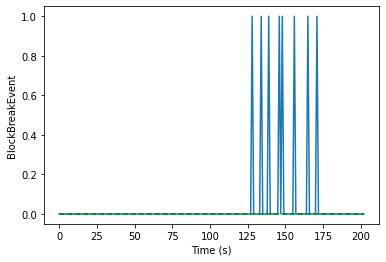

In [15]:
data_timespan = datetime.datetime.strptime(events[-1]["timestamp"], "%Y-%m-%d %H:%M:%S.%f").timestamp() - datetime.datetime.strptime(events[0]["timestamp"], "%Y-%m-%d %H:%M:%S.%f").timestamp()
data_timespan = int(data_timespan)
t1 = [x for x in range(data_timespan)]
x1 = [0 for x in range(data_timespan)]
y1 = [0 for x in range(data_timespan)]
for i in range(len(events)):
  if events[i]["event"] == "BlockBreakEvent":
    tsp = datetime.datetime.strptime(events[i]["timestamp"], "%Y-%m-%d %H:%M:%S.%f").timestamp() - datetime.datetime.strptime(events[0]["timestamp"], "%Y-%m-%d %H:%M:%S.%f").timestamp()
    x1[int(tsp)] = 1
  if events[i]["event"] == "BlockPlaceEvent":
    tsp = datetime.datetime.strptime(events[i]["timestamp"], "%Y-%m-%d %H:%M:%S.%f").timestamp() - datetime.datetime.strptime(events[0]["timestamp"], "%Y-%m-%d %H:%M:%S.%f").timestamp()
    y1[int(tsp)] = 1

plt.plot(t1, x1, linestyle='solid')
plt.plot(t1, y1, 'g--')

plt.xlabel('Time (s)')
plt.ylabel('BlockBreakEvent')

### **4. Velocity of the user**

Text(0, 0.5, 'Velocity (units)')

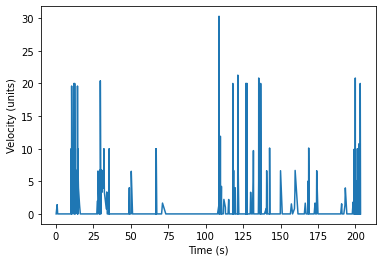

In [16]:
t1 = [t[i] for i in range(1, len(t))]
v = [0 for x in t1]
for i in range(1, len(t)):
  d = ((x[i]-x[i-1])**2 + (y[i] - y[i-1])**2)**(1/2)
  ti = t[i] - t[i-1]
  v[i-1] = d/ti
for i in range(len(v)):
  if v[i] > 100:
    v[i] = v[i]/100

plt.plot(t1, v, linestyle='solid')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (units)')